Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
#### Question 1) Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#calling the delivery_time dataset
Time_Data=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\4.Simple Linear Regression\delivery_time.csv')
Time_Data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Performing some EDA and necessary transformations

In [3]:
#Renaming the column names
Time_Data=Time_Data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis = 1)
Time_Data.head(2)

,Delivery_Time,Sorting_Time
0,21.0,10
1,13.5,4


In [4]:
Time_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
#checking for null values
Time_Data.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [6]:
#checking for dulpicates
Time_Data.duplicated().sum()

0

In [7]:
#checking summary statistics
Time_Data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


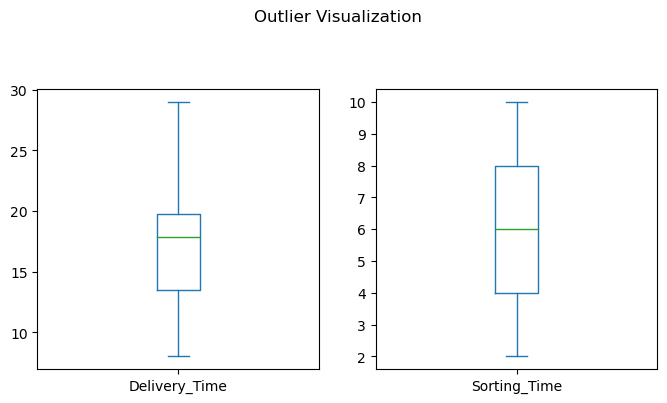

In [8]:
#outlier visualization
Time_Data.plot(kind='box',subplots=True,layout=(2,2),figsize=(8,8),title='Outlier Visualization')
plt.show()

+ Changed the column names
+ Checked the basic information and find out:
  + Datatype include float & integer
  + No null values
  + No duplicates
  + No outliers
+ There are 21 entries. Mean value for 'Delivery_Time' is 16.790952 & for 'Sorting_Time' is 6.190476.

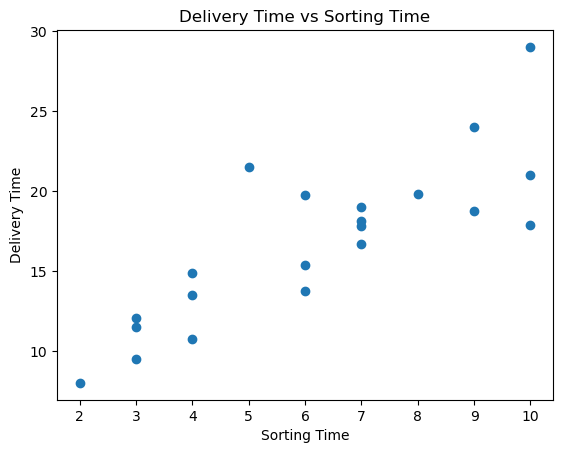

In [9]:
# Visualize the relationship between Delivery Time and Sorting Time
plt.scatter(Time_Data['Sorting_Time'],Time_Data['Delivery_Time'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Delivery Time vs Sorting Time')
plt.show()

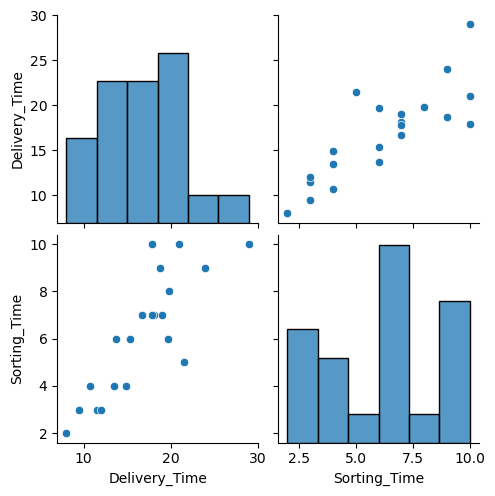

In [10]:
#checking correlation & linearity visually 
sns.pairplot(Time_Data)

In [11]:
#checking correlation
Time_Data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


By observing the pair plot we can say that there is a linear relationship between 'Delivery_Time' & 'Sorting_Time' and also they are positively correlated with score of 0.825.

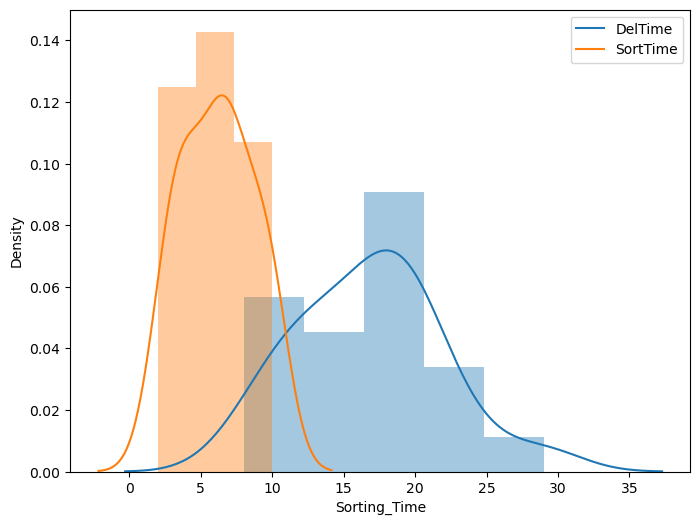

In [12]:
#checking normality visually
plt.figure(figsize=(8,6))
labels=['DelTime','SortTime']
sns.distplot(Time_Data['Delivery_Time'], kde = True)
sns.distplot(Time_Data['Sorting_Time'],hist = True)
plt.legend(labels)

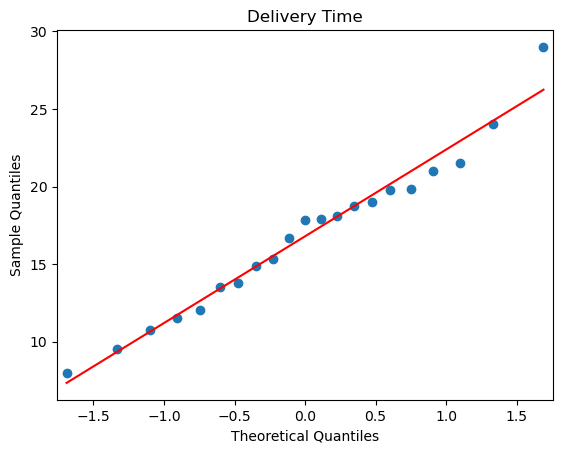

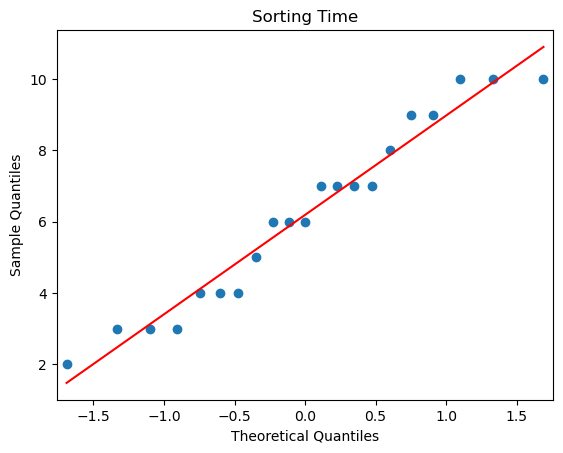

In [13]:
#checking whether the data follows normal distribution
import statsmodels.api as sm

sm.qqplot(Time_Data['Delivery_Time'],line='r')
plt.title('Delivery Time')
sm.qqplot(Time_Data['Sorting_Time'],line='r')
plt.title('Sorting Time')
plt.show()

From the above graphs we can observe that the data follows normal distribution.

### Preparing  model

In [14]:
#Build model
import statsmodels.formula.api as smf 

model=smf.ols('Delivery_Time~Sorting_Time',data=Time_Data).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        21:37:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ The linear regression model can be represented as:

###### Delivery Time = 6.583 + 1.649 * Sorting Time

+ The coefficient of 1.649 indicates that for each unit increase in sorting time, the predicted delivery time increases by       approximately 1.649 units.
+ The R-squared score of 0.682 indicates that the model explains about 68.2% of the variance in the delivery time based on the   sorting time.

###### To select the best model, we can consider trying different transformations on the data, such as square root transformation or log transformations, and comparing the performance metrics. Additionally, cross-validation techniques can help in evaluating the model's performance on unseen data.

#### # Square Root Transformation on data

In [16]:
SquareRoot_model=smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)',data=Time_Data).fit()

In [17]:
SquareRoot_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 07 Jul 2023   Prob (F-statistic):           8.48e-07
Time:                            21:37:08   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ The R-squared score of 0.729 indicates that the model explains about 72.9% of the variance in the delivery time based on the sorting time.

#### #Log Transformation on data

In [18]:
Log_model= smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=Time_Data).fit()

In [19]:
Log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 07 Jul 2023   Prob (F-statistic):           1.60e-07
Time:                           21:37:08   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ The R-squared score of 0.772 indicates that the model explains about 77.2% of the variance in the delivery time based on the sorting time.
###### After log transformation on the data,Log_model has scored the highest R-squared and Adjusted R-squared scores than the previous models
+ Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.
+ Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.

#### Residual Analysis

###### #Test for Normality of Residuals (Q-Q Plot)

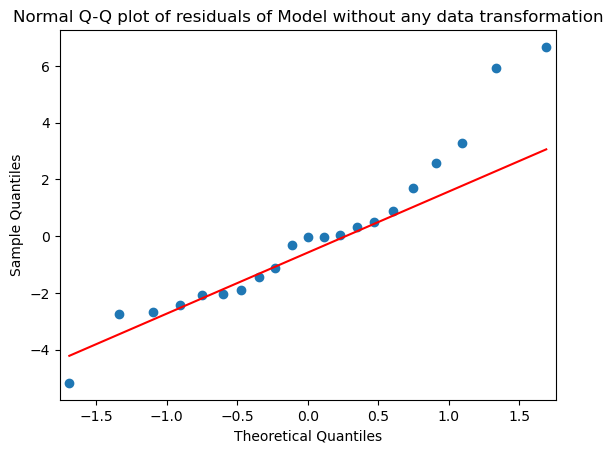

In [20]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

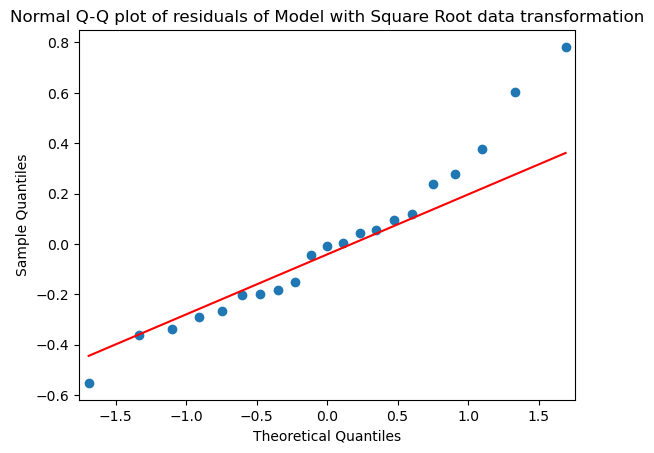

In [21]:
sm.qqplot(SquareRoot_model.resid, line='q')
plt.title('Normal Q-Q plot of residuals of Model with Square Root data transformation')
plt.show()

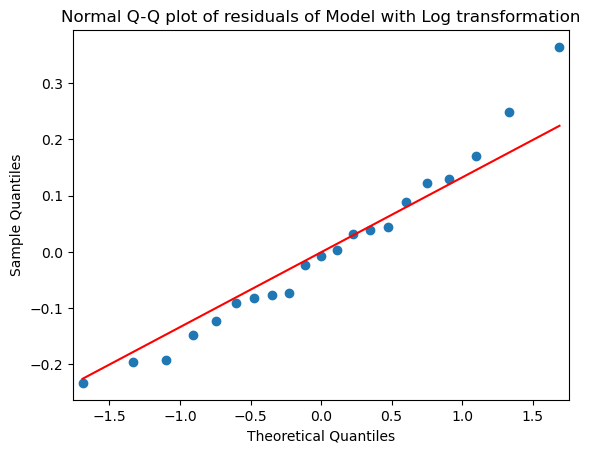

In [22]:
sm.qqplot(Log_model.resid,line='q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

+ The Model have slightly different plots
+ The first & second model is right skewed and doesn't follow normal distribution
+ The third model after log-transformation follows normal distributon with less skewness than first & second model

#### #Residual Plot to check Homoscedasticity 

In [23]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

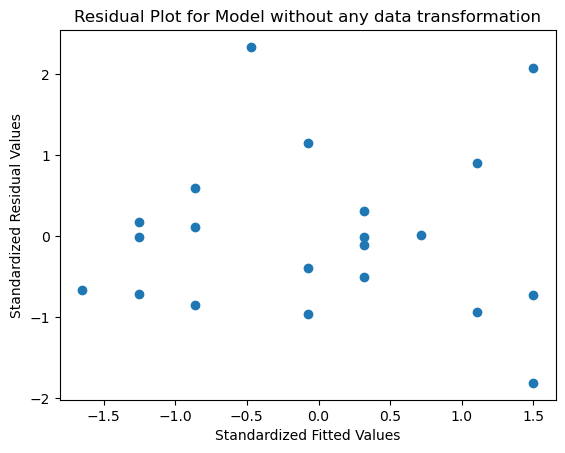

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

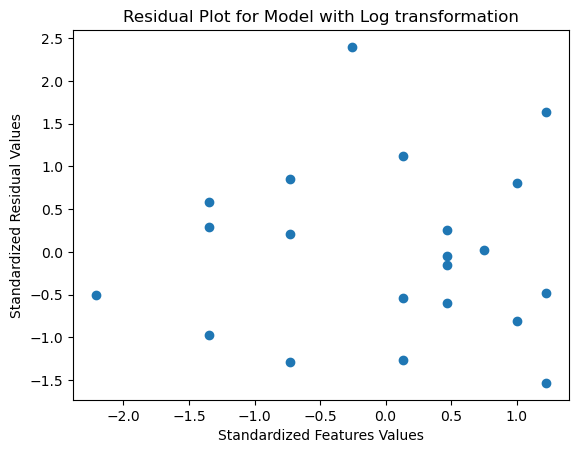

In [25]:
plt.scatter(get_standardized_values(Log_model.fittedvalues),get_standardized_values(Log_model.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

+ Both the model have Homoscedasciticity.
+ The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
+ Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

#### Model Validation

Comparing different models with respect to their Root Mean Squared Errors

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
SquareRoot_pred_y=np.square(SquareRoot_model.predict(Time_Data['Sorting_Time']))
Log_model_pred_y=np.exp(Log_model.predict(Time_Data['Sorting_Time']))

In [28]:
SquareRoot_rmse=np.sqrt(mean_squared_error(Time_Data['Delivery_Time'],SquareRoot_pred_y))
Log__rmse=np.sqrt(mean_squared_error(Time_Data['Delivery_Time'],Log_model_pred_y))
print('model=',np.sqrt(model.mse_resid),'\n' 'SquareRoot_model=',SquareRoot_rmse,'\n' 'Log_model=',Log__rmse)

model= 2.9349037688901394 
SquareRoot_model= 2.7622942793208676 
Log_model= 2.7458288976145493


In [29]:
data={'model':np.sqrt(model.mse_resid),'SquareRoot_model':SquareRoot_rmse,'Log_model':Log__rmse}
min(data,key=data.get)

'Log_model'

###### As Log_model has the minimum RMSE and highest Adjusted R-squared score,we are going to use Log_model to predict our values.

### Prediction

#### #Predicting values from Model with Log Transformation on the Data

In [30]:
predicted=pd.DataFrame()
predicted['Sorting_Time']=Time_Data.Sorting_Time
predicted['Delivery_Time']=Time_Data.Delivery_Time
predicted['Predicted_Delivery_Time']=pd.DataFrame(np.exp(Log_model.predict(predicted.Sorting_Time)))
predicted.head()

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360


### Inference
#### Therefore  the data after log transformation which give the 'Log_Model' is the best model to predict the delivery time

###############################################################################################################################

#### Question 2)  Salary_hike -> Build a prediction model for Salary_hike

In [31]:
#calling salary dataset
Salary_Data=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\4.Simple Linear Regression\Salary_Data.csv')
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### Performing some EDA and necessary transformations

In [32]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [33]:
#checking for null values
Salary_Data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [34]:
#checking for dulpicates
Salary_Data.duplicated().sum()

0

In [35]:
#checking summary statistics
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


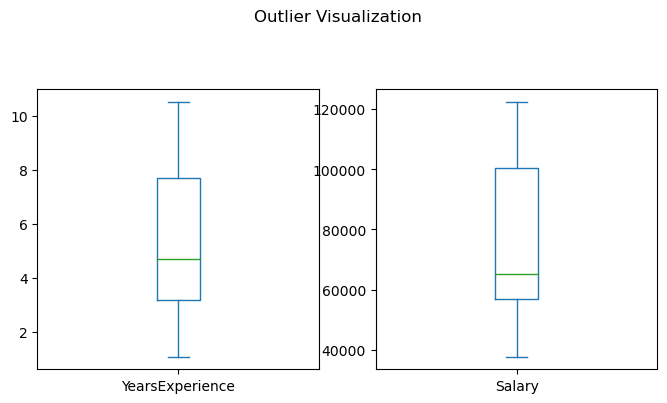

In [36]:
#outlier visualization
Salary_Data.plot(kind='box',subplots=True,layout=(2,2),figsize=(8,8),title='Outlier Visualization')
plt.show()

+ Checked the basic information and find out:
   + Datatype include float & integer
   + No null values
   + No duplicates
   + No outliers
+ There are 30 entries. Mean value for 'YearsExperience' is 5.313 & for 'Salary' is76003.000 .

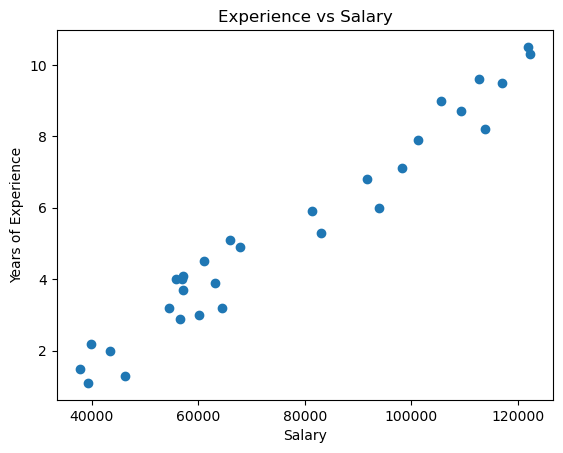

In [37]:
# Visualize the relationship between Years Experience and Salary
plt.scatter(Salary_Data['Salary'],Salary_Data['YearsExperience'])
plt.xlabel('Salary')
plt.ylabel('Years of Experience')
plt.title('Experience vs Salary')
plt.show()

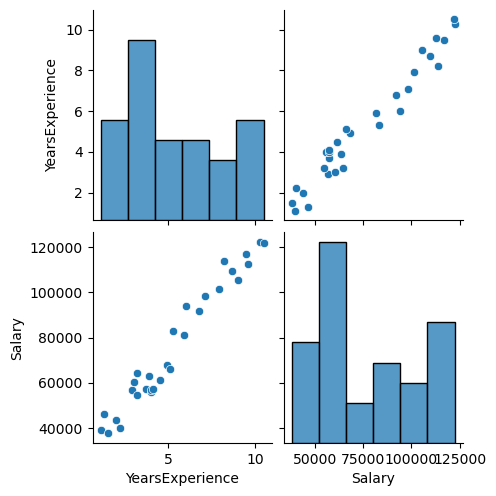

In [38]:
#checking correlation & linearity visually 
sns.pairplot(Salary_Data)

In [39]:
#checking correlation
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


By observing the pair plot we can say that there is a linear relationship between 'YearsExperience' & 'Salary' and also they are positively correlated with score of 0.9782.

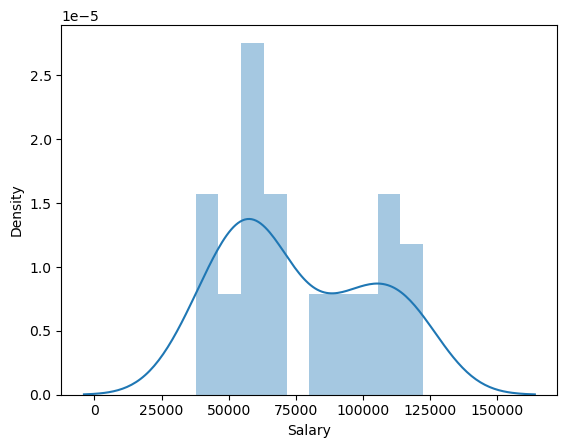

In [40]:
#checking normality visually
sns.distplot(Salary_Data['Salary'],bins=10,kde=True)
plt.show()

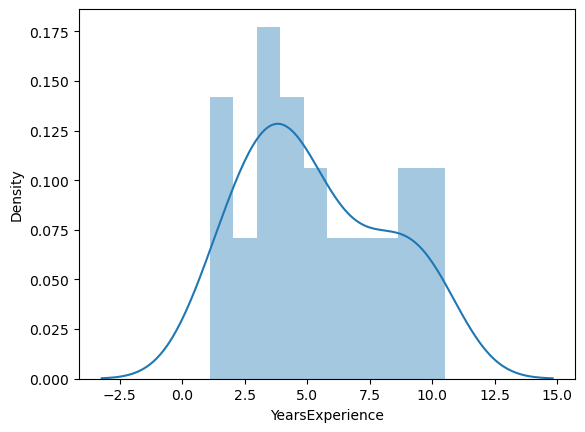

In [41]:
sns.distplot(Salary_Data['YearsExperience'],bins=10,kde=True)
plt.show()

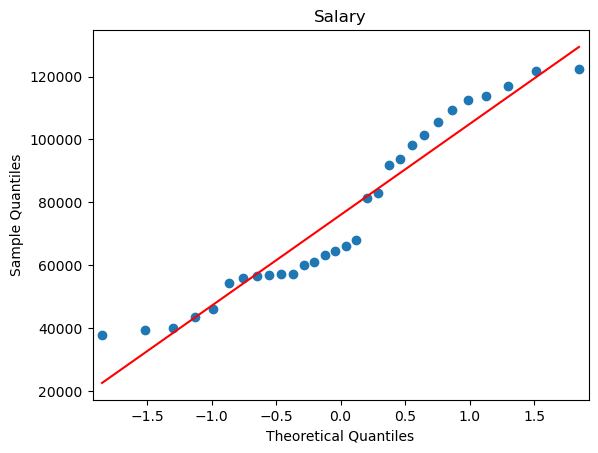

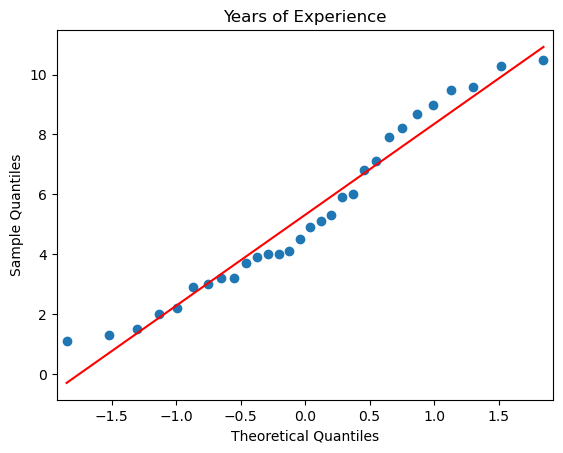

In [42]:
#checking whether the data follows normal distribution
sm.qqplot(Salary_Data['Salary'],line='r')
plt.title('Salary')
sm.qqplot(Salary_Data['YearsExperience'],line='r')
plt.title('Years of Experience')
plt.show()

In [43]:
import scipy.stats as stats

_,p1=stats.shapiro(Salary_Data['YearsExperience'])
_,p2=stats.shapiro(Salary_Data['Salary'])

# Check if both p-values are greater than 0.05 (significance level)
if p1>0.05 and p2>0.05:
    print("Both samples are normally distributed.")
else:
    print("At least one sample is not normally distributed.")

At least one sample is not normally distributed.


The data is not following normal distribution.

##### Feature Engineering

In [44]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [45]:
array=Salary_Data.values

In [46]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(scaled[0:5,:])

[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]]


In [47]:
scaled

array([[0.  , 0.02],
       [0.02, 0.1 ],
       [0.04, 0.  ],
       [0.1 , 0.07],
       [0.12, 0.03],
       [0.19, 0.22],
       [0.2 , 0.26],
       [0.22, 0.2 ],
       [0.22, 0.32],
       [0.28, 0.23],
       [0.3 , 0.3 ],
       [0.31, 0.21],
       [0.31, 0.23],
       [0.32, 0.23],
       [0.36, 0.28],
       [0.4 , 0.36],
       [0.43, 0.33],
       [0.45, 0.54],
       [0.51, 0.52],
       [0.52, 0.66],
       [0.61, 0.64],
       [0.64, 0.72],
       [0.72, 0.75],
       [0.76, 0.9 ],
       [0.81, 0.85],
       [0.84, 0.8 ],
       [0.89, 0.94],
       [0.9 , 0.88],
       [0.98, 1.  ],
       [1.  , 0.99]])

In [48]:
Scaled_Data=pd.DataFrame(scaled,columns=['YearsExperience','Salary'])
print(Scaled_Data)

    YearsExperience    Salary
0          0.000000  0.019041
1          0.021277  0.100094
2          0.042553  0.000000
3          0.095745  0.068438
4          0.117021  0.025514
5          0.191489  0.223376
6          0.202128  0.264812
7          0.223404  0.197425
8          0.223404  0.315545
9          0.276596  0.229837
10         0.297872  0.301051
11         0.308511  0.213359
12         0.308511  0.227097
13         0.319149  0.228561
14         0.361702  0.276163
15         0.404255  0.356804
16         0.425532  0.334255
17         0.446809  0.535755
18         0.510638  0.515379
19         0.521277  0.663938
20         0.606383  0.637928
21         0.638298  0.715119
22         0.723404  0.750898
23         0.755319  0.898665
24         0.808511  0.846917
25         0.840426  0.801453
26         0.893617  0.935956
27         0.904255  0.884763
28         0.978723  1.000000
29         1.000000  0.993870


Before building model we have normalized the values.

#### Building Model

In [49]:
model=smf.ols('Salary~YearsExperience',data=Scaled_Data).fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        21:37:10   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0182      0.023     -0.807      0.427      -0.065       0.028
YearsExperience     1.0493      0.042     24.950      0.000       0.963       1.135
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ The coefficient of 1.0493 indicates that for each increase in years of experience, the predicted salary increases by approximately 1.0493 units.
+ The R-squared score of 0.957 indicates that the model explains about 95.7% of the increase in the salary based on the years of experience.

##### Square Root transformation on data

In [51]:
SquareRoot_model=smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)',data=Scaled_Data).fit()
SquareRoot_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     280.3
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           4.06e-16
Time:                        21:37:10   Log-Likelihood:                 32.573
No. Observations:                  30   AIC:                            -61.15
Df Residuals:                      28   BIC:                            -58.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0136      0.041     -0.334      0.741      -0.097       0.070
np.sqrt(YearsExperience)     1.0156      0.061     16.741      0.000       0.891       1.140
==============================================================================
Omnibus:                        1.068   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.290
Skew:                          -0.169   Prob(JB):                        0.865
Kurtosis:                       3.342   Cond. No.                         5.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After square root transformation the r square value is decreased.

##### Cube Root Transformation on data

In [52]:
CubeRoot_model=smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)',data=Scaled_Data).fit()
CubeRoot_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     125.8
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           7.22e-12
Time:                        21:37:10   Log-Likelihood:                 25.929
No. Observations:                  30   AIC:                            -47.86
Df Residuals:                      28   BIC:                            -45.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0260      0.063      0.411      0.684      -0.103       0.155
np.cbrt(YearsExperience)     0.9556      0.085     11.215      0.000       0.781       1.130
==============================================================================
Omnibus:                       15.915   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.289
Skew:                          -1.096   Prob(JB):                     1.96e-06
Kurtosis:                       7.028   Cond. No.                         6.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

+ when we apply cube root transformation on data and build the model, the r square value is lesser than the previous models.
+ We can take the model with higher r square value.

#### Residual Analysis

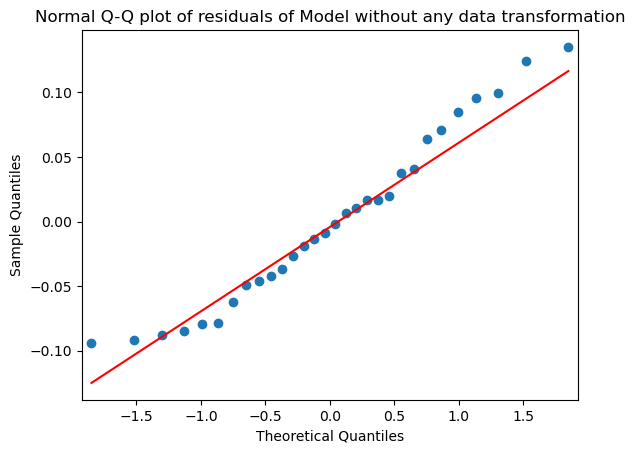

In [53]:
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

+ Model follows normal distribution.

In [54]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

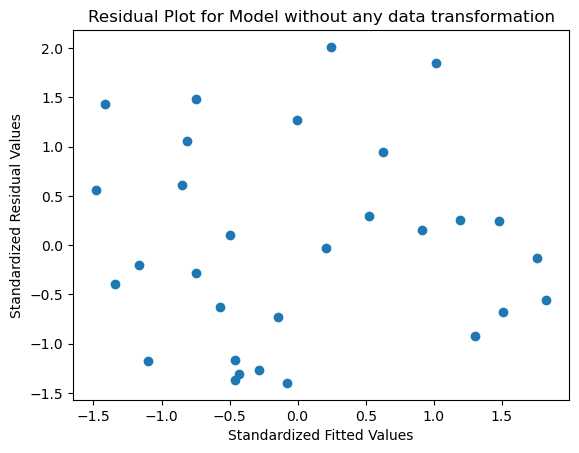

In [55]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

+ The Model have Homoscedasciticity.
+ The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
+ Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed.

#### Model Validation

In [56]:
SquareRoot_model_pred_y=np.square(SquareRoot_model.predict(Scaled_Data['YearsExperience']))
CubeRoot_model_pred_y=pow(CubeRoot_model.predict(Scaled_Data['YearsExperience']),3)

In [57]:
SquareRoot_rmse=np.sqrt(mean_squared_error(Scaled_Data['Salary'],SquareRoot_model_pred_y))
CubeRoot_rmse=np.sqrt(mean_squared_error(Scaled_Data['Salary'],CubeRoot_model_pred_y))
print('model=',np.sqrt(model.mse_resid),'\n' 'SquareRoot_model=',SquareRoot_rmse,'\n' 'CubeRoot_model=',CubeRoot_rmse)

model= 0.06837130936828956 
SquareRoot_model= 0.06721778731169334 
CubeRoot_model= 0.07694265675037602


In [58]:
data= {'model':np.sqrt(model.mse_resid),'SquareRoot_model':SquareRoot_rmse,'CubeRoot_model':CubeRoot_rmse}
min(data,key=data.get)

'SquareRoot_model'

#### Prediction

Since the data without any transformation has high r square value we are going to predict the salary hike by model.

In [59]:
# first model results without any transformation
predicted=pd.DataFrame()
predicted['YearsExperience']=Scaled_Data.YearsExperience
predicted['Salary']=Scaled_Data.Salary
predicted['Predicted_Salary_Hike']=pd.DataFrame(model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,0.000000,0.019041,-0.018236
1,0.021277,0.100094,0.004089
2,0.042553,0.000000,0.026413
3,0.095745,0.068438,0.082224
4,0.117021,0.025514,0.104549
5,0.191489,0.223376,0.182685
6,0.202128,0.264812,0.193847
7,0.223404,0.197425,0.216172
8,0.223404,0.315545,0.216172
9,0.276596,0.229837,0.271983


Since the values are normalized,we are converting it into original values.

In [60]:
# Define the range of the original values
min_salary=37731  # minimum salary before normalization
max_salary=122391 # maximum salary before normalization

min_YoE=1 # minimum year of experience before normalization
max_YoE=10 #maximum year of experience before normalization

# Perform inverse scaling for the predicted data
predicted['Predicted_Salary_Hike']=predicted['Predicted_Salary_Hike'] * (max_salary - min_salary) + min_salary
predicted['Salary']=predicted['Salary'] * (max_salary - min_salary) + min_salary
predicted['YearsExperience']=predicted['YearsExperience']*(max_YoE - min_YoE) + min_YoE

# Display the resulting dataframe
print(predicted)

    YearsExperience    Salary  Predicted_Salary_Hike
0          1.000000   39343.0           36187.158752
1          1.191489   46205.0           38077.151217
2          1.382979   37731.0           39967.143681
3          1.861702   43525.0           44692.124842
4          2.053191   39891.0           46582.117306
5          2.723404   56642.0           53197.090931
6          2.819149   60150.0           54142.087163
7          3.010638   54445.0           56032.079627
8          3.010638   64445.0           56032.079627
9          3.489362   57189.0           60757.060788
10         3.680851   63218.0           62647.053252
11         3.776596   55794.0           63592.049484
12         3.776596   56957.0           63592.049484
13         3.872340   57081.0           64537.045717
14         4.255319   61111.0           68317.030645
15         4.638298   67938.0           72097.015574
16         4.829787   66029.0           73987.008038
17         5.021277   83088.0           75877.

### Inference
###### The model that we build without any data transformation is the best model to predict the salary hike.

###############################################################################################################################